In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from collections import Counter
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./fruit_data_with_colors _1_.csv')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [3]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    60 non-null     int64  
 1   fruit_name     60 non-null     object 
 2   fruit_subtype  60 non-null     object 
 3   mass           51 non-null     float64
 4   width          60 non-null     float64
 5   height         51 non-null     float64
 6   color_score    60 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ KB


In [4]:
df = df.drop(['fruit_name', 'fruit_subtype'], axis=1)  # Dropping categorical/text/object columns, axis=1 means columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  60 non-null     int64  
 1   mass         51 non-null     float64
 2   width        60 non-null     float64
 3   height       51 non-null     float64
 4   color_score  60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [5]:
df = df.fillna(df.mean())  # Filling the missing values with mean value of that column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  60 non-null     int64  
 1   mass         60 non-null     float64
 2   width        60 non-null     float64
 3   height       60 non-null     float64
 4   color_score  60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [6]:
def euclidean_distance(row1, row2, columns, label):
    distance = 0.0
   
    for column in columns:  
        if column != label:  # Only euclidean distance for features is calculated 
            distance += (row1[column] - row2[column])**2
    
    return sqrt(distance)


def KNN(train, test_row, k, label):
    temp = train.copy()
    
    # Calculate distance for each instance in train to single test instance
    temp['dist'] = temp.apply(lambda row: euclidean_distance(row, test_row, train.columns, label), axis=1)  # axis=1 here means apply this function for each row, if axis=0 here it would mean apply this function for each column which wouldn't make sense here
    
    # Getting the k neighbors having minimum distances
    sorted_distances = temp['dist'].sort_values()   # see pandas documentation to understand this method
    k_neighbors_distances = sorted_distances[:k]
    
    # Getting the majority label from the k neighbors
    k_neighbors = temp[temp.index.isin(k_neighbors_distances.index)]  # Only get those rows/records/instances from temp dataframe which have same indices as k neighbors indices (This way we get all columns of k neighbors), see documentation to understand this 
    k_neighbors_labels = list(k_neighbors[label])   # Get the label column only of k neighbors and convert into list
    count_labels = Counter(k_neighbors_labels)  # Count labels
    predicted_label = count_labels.most_common()[0][0]   # predicted label is the label with highest count, each element in .most_common() is a tuple, each tuple is in form (label, count), so first [0] is for getting the first tuple, second [0] is for getting the label which actually is the label having highest count in k neighbors labels
    
    return predicted_label

In [7]:
pred = []
actual = []
scores = []
train = df.iloc[0:50]  # start from 0 and before 50 (49)  
test = df.iloc[50:60]  # start from 50 and before 60 (59)

for k in range(1,11):
    for i in range(test.shape[0]):
        
        pred.append( KNN(train=df, test_row=test.iloc[i], k=k, label='fruit_label') )  # .iloc is the index locator, .iloc[row_index, col_index], see pandas documentation
        actual.append(test.iloc[i, 0])   # Get 0 column of i row, 0 column is the 'fruit_label'

    scores.append(accuracy_score(actual, pred))
    pred = []
    actual = []

In [8]:
scores

[1.0, 0.9, 0.9, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]

Text(0, 0.5, 'accuracy score')

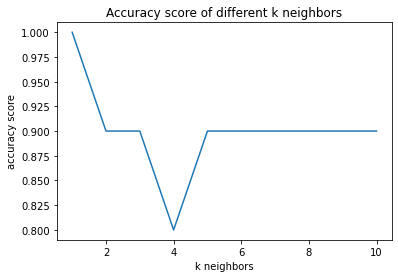

In [9]:
plt.plot(range(1,11), scores)
plt.title('Accuracy score of different k neighbors')
plt.xlabel('k neighbors')
plt.ylabel('accuracy score')
# See how for even value 4 accuracy_score significanlty decreases